In [1]:
import pandas as pd
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt


Extraigo los archivos que utilizare para poder realizar el analisis de datos y el ML segun lo requerido

In [2]:
df_games = pd.read_csv('Datasets_limpio\\steam_games.csv', encoding='utf-8')
df_reviews = pd.read_csv('Datasets_limpio\\df_reviews.csv', encoding='utf-8')
df_items = pd.read_csv('Datasets_limpio\\user_items.csv', encoding='utf-8')

C:\Users\Manuel\AppData\Local\Temp\ipykernel_31344\2251671378.py:1: DtypeWarning: Columns (4,6,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df_games = pd.read_csv('Datasets_limpio\\steam_games.csv', encoding='utf-8')
C:\Users\Manuel\AppData\Local\Temp\ipykernel_31344\2251671378.py:2: DtypeWarning: Columns (2,5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df_reviews = pd.read_csv('Datasets_limpio\\df_reviews.csv', encoding='utf-8')


FileNotFoundError: [Errno 2] No such file or directory: 'Datasets_limpio\\user_items.csv'

In [ ]:
df_reviews = df_reviews.rename(columns={'reviews_item_id':'item_id'})
df_games = df_games.rename(columns={'id':'item_id'})

In [ ]:
df_items=df_items.drop('steam_id', axis=1)

In [ ]:
df_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5094105 entries, 0 to 5094104
Data columns (total 5 columns):
 #   Column            Dtype 
---  ------            ----- 
 0   item_id           int64 
 1   item_name         object
 2   playtime_forever  int64 
 3   items_count       int64 
 4   user_id           object
dtypes: int64(3), object(2)
memory usage: 194.3+ MB


In [ ]:
#agrupo segun la cantidad de horas jugadas para reducir el peso del archivo
suma_playtime = df_items.groupby(['item_id'])['playtime_forever'].sum().reset_index()
suma_playtime['playtime_hours'] = suma_playtime['playtime_forever'] / 60

In [ ]:
suma_playtime=suma_playtime.drop('playtime_forever', axis=1)

In [ ]:
suma_playtime


,item_id,playtime_hours
0,10,285130.966667
1,20,16008.733333
2,30,12606.250000
3,40,2573.733333
4,50,12109.083333
...,...,...
10973,528580,0.000000
10974,528660,3.033333
10975,529670,0.000000
10976,529820,0.000000


In [ ]:
#Limpio las columnas que no utilizare
df_reviews=df_reviews.drop(['reviews_posted','title','developer','año_lanzamiento','reviews_helpful',],axis=1)

In [ ]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50218 entries, 0 to 50217
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   user_id             50218 non-null  object
 1   item_id             50218 non-null  int64 
 2   reviews_recommend   50218 non-null  bool  
 3   sentiment_analysis  50218 non-null  int64 
dtypes: bool(1), int64(2), object(1)
memory usage: 1.2+ MB


In [ ]:
df_games

,publisher,genres,app_name,title,price,early_access,item_id,developer,año_lanzamiento
0,Kotoshiro,Action,Lost Summoner Kitty,Lost Summoner Kitty,4.99,False,761140,Kotoshiro,2018.0
1,Kotoshiro,Casual,Lost Summoner Kitty,Lost Summoner Kitty,4.99,False,761140,Kotoshiro,2018.0
2,Kotoshiro,Indie,Lost Summoner Kitty,Lost Summoner Kitty,4.99,False,761140,Kotoshiro,2018.0
3,Kotoshiro,Simulation,Lost Summoner Kitty,Lost Summoner Kitty,4.99,False,761140,Kotoshiro,2018.0
4,Kotoshiro,Strategy,Lost Summoner Kitty,Lost Summoner Kitty,4.99,False,761140,Kotoshiro,2018.0
...,...,...,...,...,...,...,...,...,...
71545,Laush Studio,Indie,Russian Roads,Russian Roads,1.99,False,610660,Laush Dmitriy Sergeevich,2018.0
71546,Laush Studio,Racing,Russian Roads,Russian Roads,1.99,False,610660,Laush Dmitriy Sergeevich,2018.0
71547,Laush Studio,Simulation,Russian Roads,Russian Roads,1.99,False,610660,Laush Dmitriy Sergeevich,2018.0
71548,SIXNAILS,Casual,EXIT 2 - Directions,EXIT 2 - Directions,4.99,False,658870,"xropi,stev3ns",2017.0


In [ ]:
#Limpio las columnas que no utilizare
df_games=df_games.drop(['publisher','app_name','early_access','developer','año_lanzamiento'], axis=1)

In [ ]:
#uno la informacion de los dataframes para poder trabajar con un df_ml
df_ml=suma_playtime.merge(df_reviews,on='item_id', how='inner')
df_ml=df_ml.merge(df_games,on='item_id', how='inner')

In [ ]:
df_ml

,item_id,playtime_hours,user_id,reviews_recommend,sentiment_analysis,genres,title,price
0,10,285130.966667,Bennysaputra,True,2,Action,Counter-Strike,9.99
1,10,285130.966667,Monsta45,True,1,Action,Counter-Strike,9.99
2,10,285130.966667,76561198072207162,True,2,Action,Counter-Strike,9.99
3,10,285130.966667,Monsta45,True,1,Action,Counter-Strike,9.99
4,10,285130.966667,shaman3soul3,True,2,Action,Counter-Strike,9.99
...,...,...,...,...,...,...,...,...
115861,521570,54.600000,76561198071122396,True,0,Indie,You Have 10 Seconds 2,0.00
115862,521990,0.266667,mikeyg74,True,2,Action,Galactic Storm,2.99
115863,521990,0.266667,mikeyg74,True,2,Indie,Galactic Storm,2.99
115864,527340,35.050000,Limo1300,True,1,Action,What The Box?,4.99


In [ ]:
#le doy valor numerico a recommend
df_ml['reviews_recommend'] = df_ml['reviews_recommend'].astype(int)

In [ ]:
df_ml = df_ml.rename(columns={'reviews_recommend':'recommend'})

In [ ]:
df_ml

,item_id,playtime_hours,user_id,recommend,sentiment_analysis,genres,title,price
0,10,285130.966667,Bennysaputra,1,2,Action,Counter-Strike,9.99
1,10,285130.966667,Monsta45,1,1,Action,Counter-Strike,9.99
2,10,285130.966667,76561198072207162,1,2,Action,Counter-Strike,9.99
3,10,285130.966667,Monsta45,1,1,Action,Counter-Strike,9.99
4,10,285130.966667,shaman3soul3,1,2,Action,Counter-Strike,9.99
...,...,...,...,...,...,...,...,...
115861,521570,54.600000,76561198071122396,1,0,Indie,You Have 10 Seconds 2,0.00
115862,521990,0.266667,mikeyg74,1,2,Action,Galactic Storm,2.99
115863,521990,0.266667,mikeyg74,1,2,Indie,Galactic Storm,2.99
115864,527340,35.050000,Limo1300,1,1,Action,What The Box?,4.99


In [ ]:
#creo un data frame para comparar al final
df_comparacion = df_ml.copy()

In [40]:
#codifico los valores que tienen object para el analisis ML
label_encoder = LabelEncoder()

for columna in df_ml.columns:
    if df_ml[columna].dtype == 'object':
        df_ml[columna] = label_encoder.fit_transform(df_ml[columna])

In [42]:
df_ml.to_csv('Datasets_limpio/df_ml_sa.csv', sep=',', index=False)

In [43]:
df_ml

,item_id,playtime_hours,user_id,recommend,sentiment_analysis,genres,title,price
0,10,285130.966667,10241,1,2,0,496,9.99
1,10,285130.966667,12806,1,1,0,496,9.99
2,10,285130.966667,5840,1,2,0,496,9.99
3,10,285130.966667,12806,1,1,0,496,9.99
4,10,285130.966667,20042,1,2,0,496,9.99
...,...,...,...,...,...,...,...,...
115861,521570,54.600000,5664,1,0,9,2779,0.00
115862,521990,0.266667,18752,1,2,0,975,2.99
115863,521990,0.266667,18752,1,2,9,975,2.99
115864,527340,35.050000,12459,1,1,0,2710,4.99


In [44]:
df_comparacion

,item_id,playtime_hours,user_id,recommend,sentiment_analysis,genres,title,price
0,10,285130.966667,Bennysaputra,1,2,Action,Counter-Strike,9.99
1,10,285130.966667,Monsta45,1,1,Action,Counter-Strike,9.99
2,10,285130.966667,76561198072207162,1,2,Action,Counter-Strike,9.99
3,10,285130.966667,Monsta45,1,1,Action,Counter-Strike,9.99
4,10,285130.966667,shaman3soul3,1,2,Action,Counter-Strike,9.99
...,...,...,...,...,...,...,...,...
115861,521570,54.600000,76561198071122396,1,0,Indie,You Have 10 Seconds 2,0.00
115862,521990,0.266667,mikeyg74,1,2,Action,Galactic Storm,2.99
115863,521990,0.266667,mikeyg74,1,2,Indie,Galactic Storm,2.99
115864,527340,35.050000,Limo1300,1,1,Action,What The Box?,4.99


In [45]:
df_comparacion = df_comparacion.rename(columns={'user_id':'user_id_comp'})

In [46]:
df_comparacion = pd.concat([df_comparacion['user_id_comp'], df_ml['user_id']], axis=1)

In [47]:
df_comparacion

,user_id_comp,user_id
0,Bennysaputra,10241
1,Monsta45,12806
2,76561198072207162,5840
3,Monsta45,12806
4,shaman3soul3,20042
...,...,...
115861,76561198071122396,5664
115862,mikeyg74,18752
115863,mikeyg74,18752
115864,Limo1300,12459


In [48]:
df_comparacion.to_csv('Datasets_limpio/df_comparacion.csv', sep=',', index=False)

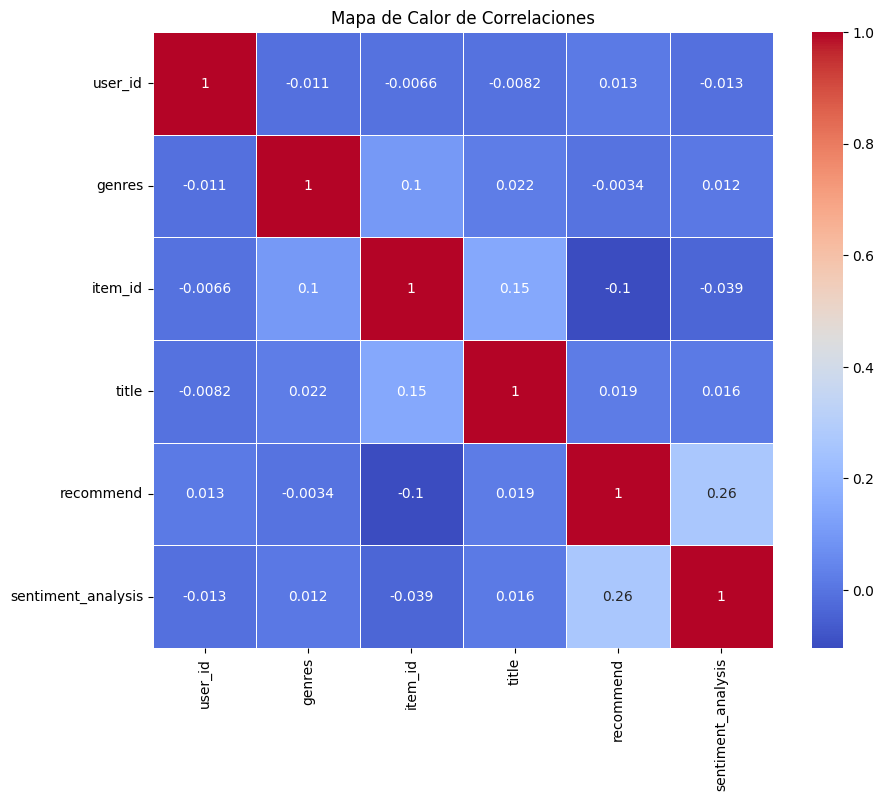

In [49]:

#Analizo las variables representativas
variables = df_ml[['user_id', 'genres', 'item_id', 'title', 'recommend', 'sentiment_analysis']]


correlation_matrix = variables.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Mapa de Calor de Correlaciones')
plt.show()

c:\Users\Manuel\AppData\Local\Programs\Python\Python311\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\Manuel\AppData\Local\Programs\Python\Python311\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


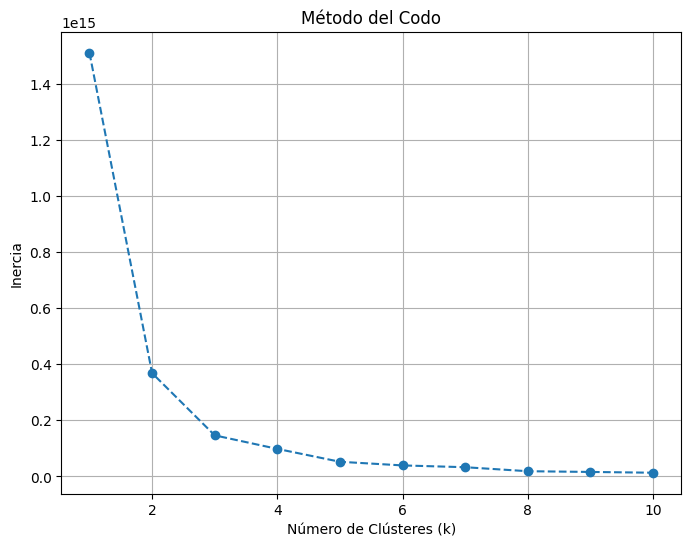

In [50]:
#elijo el mejor cluster, en este caso seria 2
X = df_ml[['user_id','genres','item_id','title','recommend','sentiment_analysis']]  


inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0, n_init='auto')
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.xlabel('Número de Clústeres (k)')
plt.ylabel('Inercia')
plt.title('Método del Codo')
plt.grid()
plt.show()

In [51]:
n_clusters = 2
features = df_ml[['genres','item_id','title','recommend','sentiment_analysis']]

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

kmeans = KMeans(n_clusters=n_clusters, random_state=0, n_init=10)
kmeans.fit(scaled_features)

df_ml['cluster'] = kmeans.labels_

In [52]:
df_ml

,item_id,playtime_hours,user_id,recommend,sentiment_analysis,genres,title,price,cluster
0,10,285130.966667,10241,1,2,0,496,9.99,0
1,10,285130.966667,12806,1,1,0,496,9.99,0
2,10,285130.966667,5840,1,2,0,496,9.99,0
3,10,285130.966667,12806,1,1,0,496,9.99,0
4,10,285130.966667,20042,1,2,0,496,9.99,0
...,...,...,...,...,...,...,...,...,...
115861,521570,54.600000,5664,1,0,9,2779,0.00,0
115862,521990,0.266667,18752,1,2,0,975,2.99,0
115863,521990,0.266667,18752,1,2,9,975,2.99,0
115864,527340,35.050000,12459,1,1,0,2710,4.99,0


In [53]:
kmeans.fit(df_ml)

KMeans(n_clusters=2, n_init=10, random_state=0)

In [54]:
cluster_labels = kmeans.labels_

df_ml['cluster'] = cluster_labels

In [55]:
df_ml.to_csv('Datasets_limpio/df_ml_sa.csv', sep=',', index=False)

In [56]:
#prueba para encontra que el id coincida con el user_id
user_id='Yunzz'

if user_id not in df_comparacion['user_id_comp'].values:
    print (f"El usuario {user_id} no se encuentra.")

user_id = df_comparacion[df_comparacion['user_id_comp'] == user_id]['user_id'].values[0]
user_id

15059

In [57]:
df_ml

,item_id,playtime_hours,user_id,recommend,sentiment_analysis,genres,title,price,cluster
0,10,285130.966667,10241,1,2,0,496,9.99,0
1,10,285130.966667,12806,1,1,0,496,9.99,0
2,10,285130.966667,5840,1,2,0,496,9.99,0
3,10,285130.966667,12806,1,1,0,496,9.99,0
4,10,285130.966667,20042,1,2,0,496,9.99,0
...,...,...,...,...,...,...,...,...,...
115861,521570,54.600000,5664,1,0,9,2779,0.00,0
115862,521990,0.266667,18752,1,2,0,975,2.99,0
115863,521990,0.266667,18752,1,2,9,975,2.99,0
115864,527340,35.050000,12459,1,1,0,2710,4.99,0


In [58]:
# recibe un user_id como argumento y devuelve las recomendaciones de juegos para ese usuario en base a su clúster.
def recomendacion_usuario(user_id:str):
    

    if user_id not in df_comparacion['user_id_comp'].values:
        return f"El usuario {user_id} no se encuentra."

    user_id2 = df_comparacion[df_comparacion['user_id_comp'] == user_id]['user_id'].values[0]

    user_cluster = df_ml[df_ml['user_id'] == user_id2]['cluster'].values[0]

    users_mismo_cluster = df_ml[df_ml['cluster'] == user_cluster]

    juegos_recomendados = users_mismo_cluster.groupby('item_id')['recommend'].sum()
    
    top_5 = juegos_recomendados.sort_values(ascending=False).head(5)
    

    recomendaciones = []
    for i, game_id in enumerate(top_5.index):
        game_name = df_games.loc[df_games['item_id'] == game_id, 'title'].values
        recomendaciones.append(f"Recomendación {i+1}: {game_name[0]}")
    respuesta = {"Recomendaciones para el usuario": user_id, "recomendaciones": recomendaciones}
    return respuesta

In [62]:
recomendacion_usuario(user_id='Blackhawk611')

{'Recomendaciones para el usuario': 'Blackhawk611',
 'recomendaciones': ['Recomendación 1: Unturned',
  'Recomendación 2: Rust',
  'Recomendación 3: Terraria',
  'Recomendación 4: DayZ',
  'Recomendación 5: Starbound']}